In [1]:
%matplotlib inline

## [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN) Clustering
- Views clusters as high-density areas surrounded by low-density areas.
- Clusters can be any shape (k-means assumes convex shapes).
- Core concept: _core samples_ in high-density areas.
- ```min_samples``` is primarily concerned with noise tolerance
- ```eps``` is crucial and usually cannot be left at the default value - if too small, most data will be treated as noise; if too large, clusters will be merged. "Knee" nearest neighbor plots can help identify optimum values.
- Not memory efficient - it builds a full pairwise similarity matrix when KD-trees or Ball Trees cannot be used. It will consume n^2 floats. Alternative approaches exist, see [scikit dbscan user guide](https://scikit-learn.org/stable/modules/clustering.html#dbscan) for details.

## Example

In [2]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples    = 750, 
                            centers      = centers, 
                            cluster_std  = 0.4,
                            random_state = 0)

X = StandardScaler().fit_transform(X)

db                = DBSCAN(eps         = 0.3, 
                           min_samples = 10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, 
                                  dtype=bool)

core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_    = list(labels).count(-1)

In [4]:
print('Est #clusters:       %d' % n_clusters_)
print('Est #noise points:   %d' % n_noise_)
print("Homogeneity:      %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness:     %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure:        %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adj Rand Index:   %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adj Mutual Inf:   %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coeff: %0.3f" % metrics.silhouette_score(X, labels))

Est #clusters:       3
Est #noise points:   18
Homogeneity:      0.953
Completeness:     0.883
V-measure:        0.917
Adj Rand Index:   0.952
Adj Mutual Inf:   0.916
Silhouette Coeff: 0.626


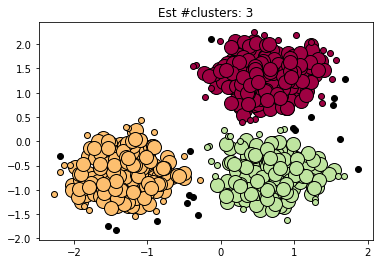

In [5]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # Black used for noise.

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]

    plt.plot(xy[:, 0], 
             xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], 
             xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Est #clusters: %d' % n_clusters_)
plt.show()